In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [3]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # Agregamos encabezado a las columnas porque no tiene
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # Datos de variables independientes
y = data.V1  # Datos de variable dependiente
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


##### Diagrama de dispersión matriz

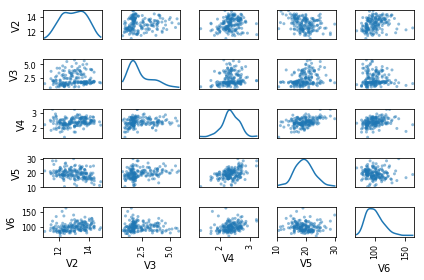

In [56]:
"""
tomamos en cuenta solo los cinco primero productos químicos -- data.loc[:,v2:v6]
El parámetro diagonal nos permite especificar si graficamos un histograma ( "hist") o una 
estimación de densidad del núcleo ( "kde") para la variable -- diagonal = kde
"""
pd.tools.plotting.scatter_matrix(data.loc[:, "V2":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()

#### Diagrama de dispersión

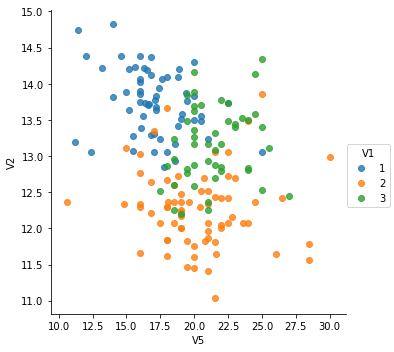

In [58]:
# Diagrama de dispersión - relación entre V5 y V4
"""
 Los dos primeros parámetros de la lmplot()función son las columnas que se trazarán entre sí en V4(x), V5(y),
 el tercer parámetro especifica los datos (data),
 el hue parámetro es el nombre de columna de las clases de vino,
 el fit_reg parámetro está configurado para False cuando no queremos trazar un modelo de regresión relacionado 
 con las variables xy
"""
sns.lmplot("V5", "V2", data, hue="V1", fit_reg=False);

#### Diagrama de perfil

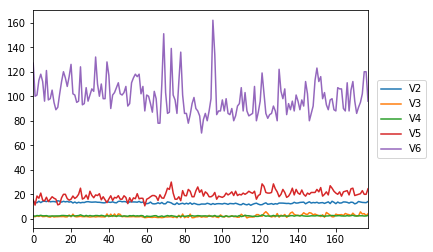

In [23]:
ax = data[["V2","V3","V4","V5","V6"]].plot()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.legend(loc='center', bbox_to_anchor=(1.1, 0.5));

### Cálculo de estadísticas de resúmen para datos multivariados
#### Media

In [24]:
#La media(promedio) para las variables independientes (por columna)
X.apply(np.mean)

V2      13.000618
V3       2.336348
V4       2.366517
V5      19.494944
V6      99.741573
V7       2.295112
V8       2.029270
V9       0.361854
V10      1.590899
V11      5.058090
V12      0.957449
V13      2.611685
V14    746.893258
dtype: float64

#### Desviación estándar

In [25]:
#La desviación estándar para las variables independientes (por columna)
X.apply(np.std)

V2       0.809543
V3       1.114004
V4       0.273572
V5       3.330170
V6      14.242308
V7       0.624091
V8       0.996049
V9       0.124103
V10      0.570749
V11      2.311765
V12      0.227929
V13      0.707993
V14    314.021657
dtype: float64

In [ ]:
"""Podemos ver aquí que tendría sentido estandarizar para comparar las variables porque las variables tienen desviaciones 
estándar muy diferentes: la desviación estándar de V14 es 314.021657, mientras que la desviación estándar de 
V9 es solo 0.124103. Por lo tanto, para comparar las variables, necesitamos estandarizar cada variable para que tenga 
una varianza muestral de 1 y una media muestral de 0."""

#### Medias y variaciones por grupo 

In [41]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable) #para las 13 variables que me agrupe por cultivo vino: 1,2,3
    print("## Media:")
    display(data_groupby.apply(np.mean))
    print("\n## Desviación estandar:")
    display(data_groupby.apply(np.std))
    print("\n## Tamaños de muestra:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [51]:
printMeanAndSdByGroup(X,y)

## Media:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Desviación estandar:


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Tamaños de muestra:


,0
V1,
1,59
2,71
3,48


#### Variación entre grupos y varianza dentro de grupos para una variable

In [47]:
levels = sorted(set(y))
numlevels = len(levels)
numlevels
levels

['1', '2', '3']

In [48]:
def calcWithinGroupsVariance(variable, groupvariable):
    # averiguar cuántos valores puede tomar la variable de grupo
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # obtener la media y la desviación estándar para cada grupo:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # obtener la desviación estándar para el grupo i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calcular la varianza dentro de los grupos
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

In [49]:
calcWithinGroupsVariance(X.V2,y)

0.2620524691539065